# NYPD Civilian Complaints
This project contains data on 12,000 civilian complaints filed against New York City police officers. Interesting questions to consider include:
- Does the length that the complaint is open depend on ethnicity/age/gender?
- Are white-officer vs non-white complaintant cases more likely to go against the complainant? 
- Are allegations more severe for cases in which the officer and complaintant are not the same ethnicity?
- Are the complaints of women more succesful than men (for the same allegations?)

There are a lot of questions that can be asked from this data, so be creative! You are not limited to the sample questions above.

### Getting the Data
The data and its corresponding data dictionary is downloadable [here](https://www.propublica.org/datastore/dataset/civilian-complaints-against-new-york-city-police-officers).

Note: you don't need to provide any information to obtain the data. Just agree to the terms of use and click "submit."

### Cleaning and EDA
- Clean the data.
    - Certain fields have "missing" data that isn't labeled as missing. For example, there are fields with the value "Unknown." Do some exploration to find those values and convert them to null values.
    - You may also want to combine the date columns to create a `datetime` column for time-series exploration.
- Understand the data in ways relevant to your question using univariate and bivariate analysis of the data as well as aggregations.

### Assessment of Missingness
- Assess the missingness per the requirements in `project03.ipynb`

### Hypothesis Test / Permutation Test
Find a hypothesis test or permutation test to perform. You can use the questions at the top of the notebook for inspiration.

# Summary of Findings

### Introduction
TODO

### Cleaning and EDA
TODO

### Assessment of Missingness
TODO

### Hypothesis Test
TODO

# Code

In [12]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures
pd.set_option('max.rows',500)
pd.set_option('max.columns',None)
allegations = pd.read_csv('data/allegations.csv')
allegations


,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,rank_abbrev_incident,rank_abbrev_now,rank_now,rank_incident,mos_ethnicity,mos_gender,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,078 PCT,POM,POM,Police Officer,Police Officer,Hispanic,M,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,PBBS,POM,POM,Police Officer,Police Officer,White,M,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,PBBS,POM,POM,Police Officer,Police Officer,White,M,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,PBBS,POM,POM,Police Officer,Police Officer,White,M,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,078 PCT,POF,POF,Police Officer,Police Officer,Hispanic,F,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33353,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,066 PCT,POM,SGT,Sergeant,Police Officer,White,M,36,Asian,Male,21.0,Discourtesy,Word,66.0,Moving violation,Moving violation summons issued,Unsubstantiated
33354,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,066 PCT,POM,SGT,Sergeant,Police Officer,White,M,36,Asian,Male,21.0,Abuse of Authority,Interference with recording,66.0,Moving violation,Moving violation summons issued,Unsubstantiated
33355,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,066 PCT,POM,SGT,Sergeant,Police Officer,White,M,36,Asian,Male,21.0,Abuse of Authority,Search (of person),66.0,Moving violation,Moving violation summons issued,Substantiated (Formalized Training)
33356,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,066 PCT,POM,SGT,Sergeant,Police Officer,White,M,36,Asian,Male,21.0,Abuse of Authority,Vehicle search,66.0,Moving violation,Moving violation summons issued,Substantiated (Formalized Training)


In [13]:
#Read in the file 
allegations = pd.read_csv('data/allegations.csv')
#Asses missing data and replace with Nan
allegations = allegations.replace("Unknown",np.nan)

def clean_disposition(values):
    if "Substantiated" in values:
        return "Substantiated"
    elif "Unsubstantiated" in values:
        return "Unsubstantiated"
    elif "Exonerated" in values:
        return "Exonerated"
allegations["board_disposition"] =  allegations["board_disposition"].apply(clean_disposition)

In [3]:
#Overall plan 
#Possible Question 1: Are allegations more severe for cases in which the officer and complaintant are not the same ethnicity?
allegations

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,rank_abbrev_incident,rank_abbrev_now,rank_now,rank_incident,mos_ethnicity,mos_gender,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,078 PCT,POM,POM,Police Officer,Police Officer,Hispanic,M,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,PBBS,POM,POM,Police Officer,Police Officer,White,M,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,PBBS,POM,POM,Police Officer,Police Officer,White,M,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,PBBS,POM,POM,Police Officer,Police Officer,White,M,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,078 PCT,POF,POF,Police Officer,Police Officer,Hispanic,F,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33353,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,066 PCT,POM,SGT,Sergeant,Police Officer,White,M,36,Asian,Male,21.0,Discourtesy,Word,66.0,Moving violation,Moving violation summons issued,Unsubstantiated
33354,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,066 PCT,POM,SGT,Sergeant,Police Officer,White,M,36,Asian,Male,21.0,Abuse of Authority,Interference with recording,66.0,Moving violation,Moving violation summons issued,Unsubstantiated
33355,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,066 PCT,POM,SGT,Sergeant,Police Officer,White,M,36,Asian,Male,21.0,Abuse of Authority,Search (of person),66.0,Moving violation,Moving violation summons issued,Substantiated
33356,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,066 PCT,POM,SGT,Sergeant,Police Officer,White,M,36,Asian,Male,21.0,Abuse of Authority,Vehicle search,66.0,Moving violation,Moving violation summons issued,Substantiated


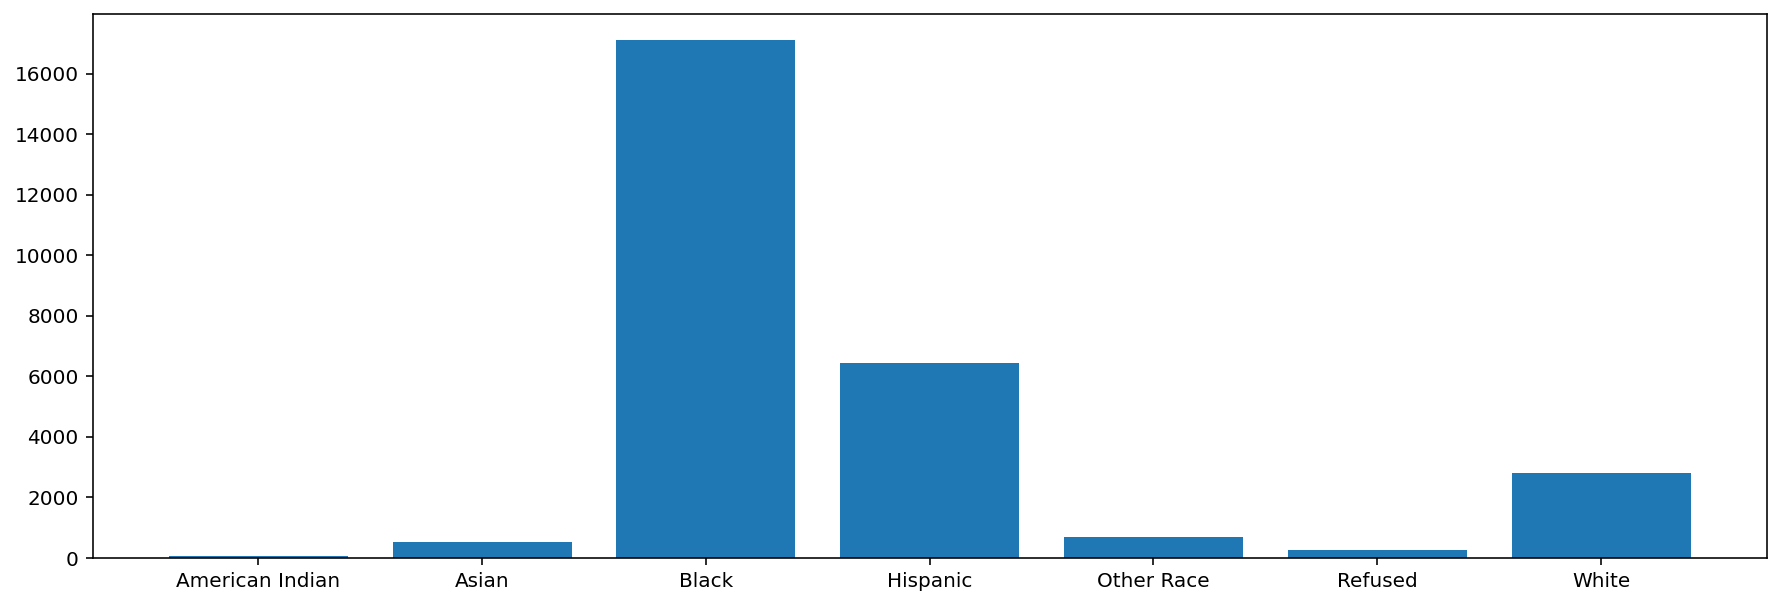

In [4]:
#Exploratory Analysis 
f, ax = plt.subplots(figsize=(15,5))
ethnicities = allegations.groupby("complainant_ethnicity")["first_name"].count()
ethnicity_plot = plt.bar(ethnicities.index,ethnicities.values,label= "Complainant Ethnicity")
plt.show()

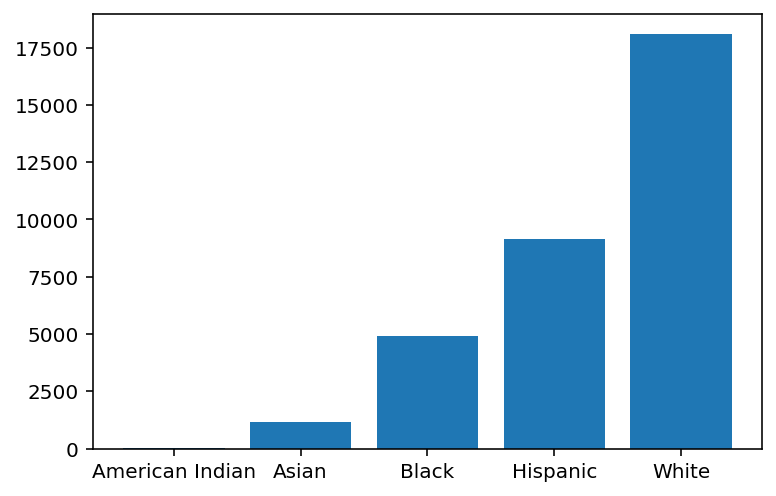

In [5]:
mos_ethniciteis = allegations.groupby("mos_ethnicity")["first_name"].count()
mos_ethnicity_plot = plt.bar(mos_ethniciteis.index,mos_ethniciteis.values,label = "mos Ethnicity")
plt.show()

In [6]:
allegations.groupby(["board_disposition","complainant_ethnicity"]).count()

unique_mos_id  first_name  last_name  \
board_disposition complainant_ethnicity                                         
Exonerated        American Indian                   17          17         17   
                  Asian                            149         149        149   
                  Black                           4859        4859       4859   
                  Hispanic                        1689        1689       1689   
                  Other Race                       158         158        158   
                  Refused                           70          70         70   
                  White                            697         697        697   
Substantiated     American Indian                   23          23         23   
                  Asian                            155         155        155   
                  Black                           4073        4073       4073   
                  Hispanic                        1572        1572       1572   
                  Other Race                       182         182        182   
                  Refused                           70          70         70   
                  White                            777         777        777   
Unsubstantiated   American Indian                   24          24         24   
                  Asian                            228         228        228   
                  Black                           8182        8182       8182   
                  Hispanic                        3163        3163       3163   
                  Other Race                       337         337        337   
                  Refused                          119         119        119   
                  White                           1309        1309       1309   

                                         command_now  shield_no  complaint_id  \
board_disposition complainant_ethnicity                                         
Exonerated        American Indian                 17         17            17   
                  Asian                          149        149           149   
                  Black                         4859       4859          4859   
                  Hispanic                      1689       1689          1689   
                  Other Race                     158        158           158   
                  Refused                         70         70            70   
                  White                          697        697           697   
Substantiated     American Indian                 23         23            23   
                  Asian                          155        155           155   
                  Black                         4073       4073          4073   
                  Hispanic                      1572       1572          1572   
                  Other Race                     182        182           182   
                  Refused                         70         70            70   
                  White                          777        777           777   
Unsubstantiated   American Indian                 24         24            24   
                  Asian                          228        228           228   
                  Black                         8182       8182          8182   
                  Hispanic                      3163       3163          3163   
                  Other Race                     337        337           337   
                  Refused                        119        119           119   
                  White                         1309       1309          1309   

                                         month_received  year_received  \
board_disposition complainant_ethnicity                                  
Exonerated        American Indian                    17             17   
                  Asian                             149            149   
                 

In [7]:
allegations_white = allegations.loc[(allegations["mos_ethnicity"]=="White") & (allegations["complainant_ethnicity"]=="White")   ]
df_white = allegations_white.groupby(["board_disposition"]).count()
prop_against = df_white["first_name"]/df_white["first_name"].sum()
prop_against


board_disposition
Exonerated         0.256223
Substantiated      0.264117
Unsubstantiated    0.479660
Name: first_name, dtype: float64

In [8]:

allegations_non_white = allegations.loc[(allegations["mos_ethnicity"]=="White") & (allegations["complainant_ethnicity"]!="White")]
df_non_white = allegations_non_white.groupby(["board_disposition"]).count()
prop_against = df_non_white["first_name"]/df_non_white["first_name"].sum()
prop_against

board_disposition
Exonerated         0.299933
Substantiated      0.239545
Unsubstantiated    0.460522
Name: first_name, dtype: float64

In [9]:
#Convert dates to datetime objects
year_and_month_received = allegations[["month_received","year_received"]]
print(year_and_month_received.info())

def combine_dates(month,year):
    return pd.datetime(year,month,1)
allegations["year_month_received"] = allegations
    
# year_and_month_received

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33358 entries, 0 to 33357
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   month_received  33358 non-null  int64
 1   year_received   33358 non-null  int64
dtypes: int64(2)
memory usage: 521.3 KB
None


ValueError: Wrong number of items passed 27, placement implies 1

In [ ]:
#Used this to check for missing values
for col in allegations:
    print(col +": "+ str(allegations[col].unique()))

unique_mos_id: [10004 10007 10009 ...  9979  9984  9992]
first_name: ['Jonathan' 'John' 'Noemi' ... 'Colbert' 'Inna' 'Novaidul']
last_name: ['Ruiz' 'Sears' 'Sierra' ... 'Neon' 'Paris' 'Pulawski']
command_now: ['078 PCT' '079 DET' '010 PCT' '079 PCT' '013 DET' '001 PCT' '081 DET'
 '081 PCT' '083 DET' '083 PCT' '013 PCT' '084 DET' '084 PCT' '088 DET'
 '001 DET' '088 PCT' '090 DET' '090 PCT' '094 DET' '094 PCT' '100 PCT'
 '101 DET' '101 PCT' '102 DET' '102 PCT' '103 DET' '103 PCT' '017 DET'
 '104 DET' '104 PCT' '017 PCT' '105 DET' '105 PCT' '106 DET' '106 PCT'
 '107 DET' '107 PCT' '108 DET' '108 PCT' '109 DET' '109 PCT' '110 DET'
 '110 PCT' '019 DET' '111 DET' '111 PCT' '112 DET' '112 PCT' '019 PCT'
 '113 DET' '113 PCT' '114 DET' '114 PCT' '115 DET' '115 PCT' '120 DET'
 '120 PCT' '121 DET' '121 PCT' '122 DET' '122 PCT' '123 DET' '123 PCT'
 'A&E' 'AUTO CR' 'AUX P.S' 'AV.UNIT' '020 DET' 'BARRIER' 'BK SVS'
 'BKLN CT' 'BKROBSQ' '020 PCT' 'BM SEC' 'BOMB SQ' 'BUS UT' 'BX CT'
 'BX SVS' 'BXROBSQ'

In [ ]:
for col in allegations:
    print(allegations[col].value_counts())

18731    75
25861    75
19489    73
18530    73
18589    72
25814    65
22775    63
25478    56
20982    56
32054    50
26487    47
25785    47
22881    46
10436    46
13622    45
23903    45
18612    45
14974    44
32623    44
11185    44
15557    44
35957    44
21527    44
23534    43
19125    43
27505    42
19381    42
2622     42
23290    42
14714    42
10039    41
12231    41
22956    41
18605    41
25275    40
25465    40
8305     40
32684    40
3552     39
23323    39
25359    38
8733     38
25331    37
18591    37
22769    37
22730    36
21450    36
23048    36
30272    36
5299     35
8735     35
9149     35
3870     35
6373     35
21224    35
22808    34
25700    34
25998    33
24024    33
20022    33
8747     33
7968     33
29578    33
8518     33
24271    33
6307     33
34679    33
5303     33
31972    32
16150    32
10188    32
12357    32
19469    32
32024    32
12651    32
23148    32
20436    32
16060    31
19773    31
14377    31
14346    31
36021    31
6018     31
1497

In [ ]:
for col in allegations:
    print("Column: "+col+" Nulls: "+ str(allegations[col].isna().sum()))

Column: unique_mos_id Nulls: 0
Column: first_name Nulls: 0
Column: last_name Nulls: 0
Column: command_now Nulls: 0
Column: shield_no Nulls: 0
Column: complaint_id Nulls: 0
Column: month_received Nulls: 0
Column: year_received Nulls: 0
Column: month_closed Nulls: 0
Column: year_closed Nulls: 0
Column: command_at_incident Nulls: 1544
Column: rank_abbrev_incident Nulls: 0
Column: rank_abbrev_now Nulls: 0
Column: rank_now Nulls: 0
Column: rank_incident Nulls: 0
Column: mos_ethnicity Nulls: 0
Column: mos_gender Nulls: 0
Column: mos_age_incident Nulls: 0
Column: complainant_ethnicity Nulls: 4464
Column: complainant_gender Nulls: 4195
Column: complainant_age_incident Nulls: 4812
Column: fado_type Nulls: 0
Column: allegation Nulls: 1
Column: precinct Nulls: 24
Column: contact_reason Nulls: 199
Column: outcome_description Nulls: 56
Column: board_disposition Nulls: 0


### Cleaning and EDA

In [ ]:
# TODO
#allegations.replace("unknown",np.nan)
# for col in allegations:
#     print("Column: "+col+" Nulls: "+ str(allegations[col].isna().sum()))
allegations = allegations.replace("Unknown",np.nan)
for col in allegations:
    print("Column: "+col+" Nulls: "+ str(allegations[col].isna().sum()))


Column: unique_mos_id Nulls: 0
Column: first_name Nulls: 0
Column: last_name Nulls: 0
Column: command_now Nulls: 0
Column: shield_no Nulls: 0
Column: complaint_id Nulls: 0
Column: month_received Nulls: 0
Column: year_received Nulls: 0
Column: month_closed Nulls: 0
Column: year_closed Nulls: 0
Column: command_at_incident Nulls: 1544
Column: rank_abbrev_incident Nulls: 0
Column: rank_abbrev_now Nulls: 0
Column: rank_now Nulls: 0
Column: rank_incident Nulls: 0
Column: mos_ethnicity Nulls: 0
Column: mos_gender Nulls: 0
Column: mos_age_incident Nulls: 0
Column: complainant_ethnicity Nulls: 5505
Column: complainant_gender Nulls: 4195
Column: complainant_age_incident Nulls: 4812
Column: fado_type Nulls: 0
Column: allegation Nulls: 1
Column: precinct Nulls: 24
Column: contact_reason Nulls: 199
Column: outcome_description Nulls: 56
Column: board_disposition Nulls: 0


### Assessment of Missingness

In [ ]:
# TODO

### Hypothesis Test

In [ ]:
# TODO